In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dp(num):
    """
    Helper function that creates number with quadruple precision
    """
    return np.float64(num)

In [3]:
def howManyNodes(y):
    """
    Helper function that returns the number
    of nodes where y = 0
    """
    numNodes = 0
    for i in range(len(y)-1):
        if y[i+1] * y[i] < 0: 
            numNodes += 1

    return numNodes

In [4]:
def string(x):
    """
    Function that describes potential 
    under consideration
    """
    return 0.5 * x**2

In [5]:
def func(x, energy, deltaX, potential):
    """
    Function that Numerov Scheme have
    as an input
    """
    return 1.0 + 2.0 * (energy - potential(x)) * deltaX**2 / 12.0 

In [6]:
def numerovScheme(x, y0, y1, func, energy, deltaX, potential):
    """
    Numerov numeric method.
    Input:
    x  - mesh points x0, x1, ..., xN
    y0 - initial condition, value of y[0]
    y1 - initial condition, value of y[1]
    f  - function where potential is included 
    Output:
    y  - array of y(x0), y(x1), ..., y(xN) according to Numerov method 
    """

    # Initializing the ouput array with zeros
    y = np.zeros(len(x))
    # Initial conditions
    y[0] = y0
    y[1] = y1
    # Creating array of f(x0), f(x1), ..., f(xN)
    f = func(x, energy, deltaX, potential)
    # Main cycle of numeric scheme
    for i in range(2, len(x)):
        # Preventing zero division
        if (f[i] == 0.0): f[i] = 1E-20 
        y[i] = ( (12.0 - 10.0 * f[i-1]) * y[i-1] - f[i-2] * y[i-2] ) / f[i] 
    return y

In [7]:
def bisection(xmax, nmax, numNodes, trialEnergy, tolerance=1E-10, verbose=False):
    """
    Function where shooting method is implimented
    """
    # Create grid x0, x1, ..., xN. Have special function
    # in numpy for that purpose. Rember we consider 
    # only x >= 0, because in our case V(x) = V(-x)
    x = np.linspace(0, xmax, nmax+1)

    deltaX = float(xmax) / float(nmax)
    assert deltaX == x[1] - x[0], 'Something wrong with space interval dx'

    if trialEnergy == dp(0.0):
        maxEnergy = dp(100) # big enough
        minEnergy = dp(0) # energy >= 0
        energy = (maxEnergy + minEnergy) / 2.0
    else:
        # In this case we don't need to appply
        # bisection method so we have to do
        # only one iteration
        maxEnergy = trialEnergy
        minEnergy = trialEnergy
        energy = trialEnergy

    # Print header
    print("\tIter\tEnergy\t\tNumNodes\tDesired NumNodes\n")
    numIter = 0 
    # Some kind of do ... while loop
    while True:
        # Increasing number of interations
        numIter += 1

        # Beware the integer division: 1/2 = 0 !
        # if nodes is even, there are 2*halfNodes nodes
        # if nodes is odd,  there are 2*halfNodes+1 nodes (one is in x=0)
        # hnodes is thus the number of nodes in the x>0 semi-axis (x=0 excepted)
        halfNodes = numNodes / 2


        # Different initial condigion for diffrent even and odd number of nodes
        if numNodes % 2 == 0:
            y0 = 1.0 # some arbitrary finite number
            y1 = ( (12.0 - 10.0 * func(x[0], energy, deltaX, potential=string)) * y0 / \
                   (2.0 * func(x[1], energy, deltaX, potential=string)) )
        else:
            y0 = 0.0 
            y1 = deltaX # small number finite number

        # Caclulating y 
        y = numerovScheme(x, y0, y1, func, energy, deltaX, string)

        # Calculating new value of energy that depends on
        # current number of nodes
        numNodesFromY = howManyNodes(y)

        if not verbose:
            print('%10d\t%10.10f\t%10d\t%10d' % (numIter, energy, numNodesFromY, halfNodes))

        if numNodesFromY > halfNodes:
            maxEnergy = energy 
        else:
            minEnergy = energy 

        energy = (maxEnergy + minEnergy) / 2.0

        # Break if trialEnergy != 0
        if energy == maxEnergy: break 

        #  ---- convergence has been achieved (or it wasn't required) -----
        #  Note that the wavefunction is not normalized: 
        #  the problem is the divergence at large |x| 
        if abs(maxEnergy - energy) < tolerance: break

    return (energy, x, y)

In [19]:
xmax = 10
nmax = 1000
numNodes = 0
trialEnergy = 0.0
(energy, x, y) = bisection(xmax, nmax, numNodes, trialEnergy)

	Iter	Energy		NumNodes	Desired NumNodes

         1	50.0000000000	        25	         0
         2	25.0000000000	        13	         0
         3	12.5000000000	         7	         0
         4	6.2500000000	         3	         0
         5	3.1250000000	         2	         0
         6	1.5625000000	         1	         0
         7	0.7812500000	         1	         0
         8	0.3906250000	         0	         0
         9	0.5859375000	         1	         0
        10	0.4882812500	         0	         0
        11	0.5371093750	         1	         0
        12	0.5126953125	         1	         0
        13	0.5004882812	         1	         0
        14	0.4943847656	         0	         0
        15	0.4974365234	         0	         0
        16	0.4989624023	         0	         0
        17	0.4997253418	         0	         0
        18	0.5001068115	         1	         0
        19	0.4999160767	         0	         0
        20	0.5000114441	         1	         0
        21	0.4999637604	         0	 

In [15]:
(energy, x, y) = bisection(xmax, nmax, numNodes, trialEnergy=25.0)

	Iter	Energy		NumNodes	Desired NumNodes

         1	25.0000000000	        13	         0


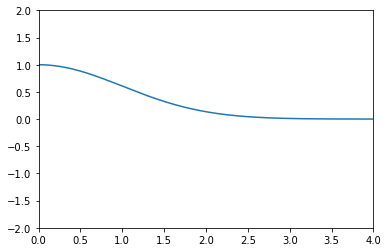

In [22]:
plt.plot(x, y)
plt.xlim(0, 4)
plt.ylim(-2, 2)
plt.show()